# SIS hyperparameters
Generate an epidemic with some unknown "true" $(\lambda, \kappa)$, then try to infer them by doing a grid search and comparing the log-likelihood (negative Bethe free energy)

In [1]:
import Pkg; Pkg.activate("..")

  Activating project at `~/MPdBP/MatrixProductBP`


In [2]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, Plots, Printf, IndexedGraphs, Statistics, Random
using Base.Threads
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [20]:
T = 10
N = 30
k = 4
gg = random_regular_graph(N, k)
g = IndexedGraph(gg)
t = SimpleGraph(prim_mst(gg))
g = IndexedGraph(t)
@assert is_connected(g)
λ_true = 0.2
κ_true = 0.1
γ = 3/N;

In [21]:
sis_true = SIS(g, λ_true, κ_true, T; γ)
X, _ = onesample(mpbp(sis_true));

In [22]:
lambdas = 0.01:0.05:0.3
kappas = 0.01:0.05:0.3
f = fill!(lambdas*kappas', 0);

In [23]:
nobs = (T*N) ÷ 1

300

In [24]:
for (i,λ) in enumerate(lambdas)
    println("## λ $i of ", length(lambdas))
    @threads for j in eachindex(kappas)
        κ = kappas[j]
        bp = mpbp(SIS(g, λ, κ, T; γ))
        rng = MersenneTwister(0)
        draw_node_observations!(bp.ϕ, X, nobs; rng)
        iterate!(bp; maxiter=100, tol=1e-3, showprogress=false)
        f[i,j] = bethe_free_energy(bp)
    end
end

## λ 1 of 6
## λ 2 of 6
## λ 3 of 6
## λ 4 of 6
## λ 5 of 6
## λ 6 of 6


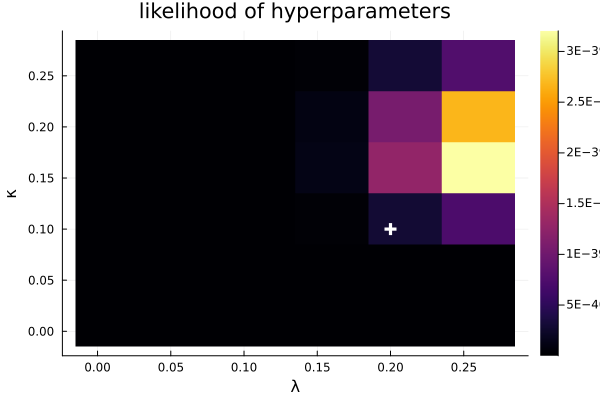

In [25]:
heatmap(lambdas, kappas, exp.(-f)',title="likelihood of hyperparameters", xlabel="λ", ylabel="κ")
scatter!([λ_true], [κ_true], m=:plus, label="", c=:white, msw=4, ms=6)